In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
rides = "Resources/ride_data.csv"
city = "Resources/city_data.csv"

In [4]:
#importing csv file rides_data
rides_pd = pd.read_csv(rides)
rides_pd.head()

,city,date,fare,ride_id
0,Alvarezhaven,4/18/16 20:51,31.93,4.270000e+12
1,Alvarezhaven,8/1/16 0:39,6.42,8.390000e+12
2,Alvarezhaven,9/1/16 22:57,18.09,1.200000e+12
3,Alvarezhaven,8/18/16 7:12,20.74,3.570000e+11
4,Alvarezhaven,4/4/16 23:45,14.25,6.430000e+12


In [5]:
#importing csv file city_data
city_pd = pd.read_csv(city)
city_pd.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
#calling the columns
rides_pd.columns


Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [7]:
#calling the columns
city_pd.columns

Index(['city', 'driver_count', 'type'], dtype='object')

In [8]:
#fixing the duplicate/mispelled city name
city_pd2 = city_pd.groupby(["city"], as_index=False).agg({"driver_count":"sum","type":"min"})
city_pd2.count()

city            125
driver_count    125
type            125
dtype: int64

In [9]:
#merging the two spreadsheets
merged_df = pd.merge(rides_pd, city_pd2,how="inner",on="city")
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Alvarezhaven,4/18/16 20:51,31.93,4.270000e+12,21,Urban
1,Alvarezhaven,8/1/16 0:39,6.42,8.390000e+12,21,Urban
2,Alvarezhaven,9/1/16 22:57,18.09,1.200000e+12,21,Urban
3,Alvarezhaven,8/18/16 7:12,20.74,3.570000e+11,21,Urban
4,Alvarezhaven,4/4/16 23:45,14.25,6.430000e+12,21,Urban


In [10]:
#Average Fare ($) Per City
avg_fare = rides_pd.groupby('city').fare.mean()
avg_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [11]:
#Total Number of Rides Per City
total_rides = merged_df.groupby('city').ride_id.count()
total_rides.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [12]:
#Total Number of Drivers Per City
driver_count_city = city_pd.groupby('city')["driver_count"].sum()
driver_count_city.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [13]:
#City Type (Urban, Suburban, Rural)
type_area = city_pd['type'].value_counts()
type_area



Urban       66
Suburban    41
Rural       18
Name: type, dtype: int64

In [14]:
#% of Total Fares by City Type
total_fares = merged_df.groupby('type').fare.sum()
total_fares

type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: fare, dtype: float64

In [15]:
#% of Total rides by City Type
total_rides = merged_df.groupby('type').fare.count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: fare, dtype: int64

In [16]:
#% of Total Drivers by City Type
#driver_area = city_pd.groupby('type').driver_count.sum()
total_driver_type = city_pd2.groupby('type')["driver_count"].sum()
total_driver_type

type
Rural        104
Suburban     635
Urban       2607
Name: driver_count, dtype: int64

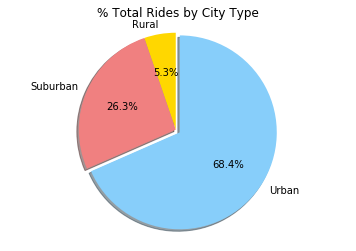

In [17]:

fig = plt.figure()
ax = fig.add_subplot(111)

types_area = ["Rural", "Suburban", "Urban"]
#numbers = [125, 635, 1625]
numbers = total_rides
colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.05)

x_axis = np.arange(0, len(types_area))

ax.set_title("% Total Rides by City Type")
ax.pie(numbers, explode=explode, labels=types_area, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")

plt.show()

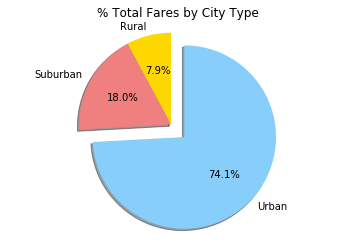

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

types_area = ["Rural", "Suburban", "Urban"]
money = [4255.09, 9730, 40078.34]

colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.2)

x_axis = np.arange(0, len(types_area))

ax.set_title("% Total Fares by City Type")
ax.pie(money, explode=explode, labels=types_area, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")

plt.show()

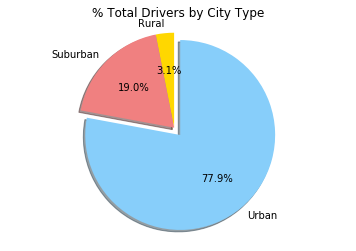

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

types_area = ["Rural", "Suburban", "Urban"]
driver_area = [104, 635, 2607]

colors = ["gold", "lightcoral", "lightskyblue"]
explode = (0, 0, 0.1)

x_axis = np.arange(0, len(types_area))

ax.set_title("% Total Drivers by City Type")
ax.pie(driver_area, explode=explode, labels=types_area, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("equal")

plt.show()

In [20]:
city_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
city            125 non-null object
driver_count    125 non-null int64
type            125 non-null object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


In [36]:
rural_cities = merged_df[merged_df['type'] == "Rural"]
urban_cities = merged_df[merged_df['type'] == "Urban"]
suburban_cities = merged_df[merged_df['type'] == "Suburban"]

# # x-axis
urban_ride_count = urban_cities.groupby(["city"]).count()["fare"]
# #y-axis
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

# # x-axis
rural_ride_count = rural_cities.groupby(["city"]).count()["fare"]
# #y-axis
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

# # x-axis
suburban_ride_count = suburban_cities.groupby(["city"]).count()["fare"]
# #y-axis
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]


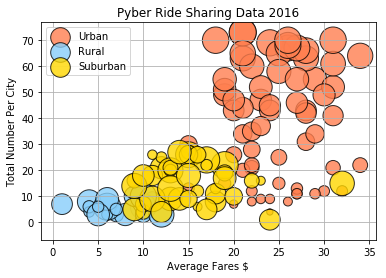

In [41]:
plt.scatter(urban_ride_count,
            urban_driver_count,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(rural_ride_count,
            rural_driver_count,
            s=10*urban_driver_count, c="lightskyblue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural")

plt.scatter(suburban_ride_count,
            suburban_driver_count,
            s=10*urban_driver_count, c="gold",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                  numpoints=1, scatterpoints=1,
                  loc="best", title="City Types",
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Create legend.
plt.legend(loc='upper left')                      
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Average Fares $")
plt.ylabel("Total Number Per City")
plt.grid(True)


plt.show()
